# Google Data Analytics Capstone Project  
**Business objective - To understand how casual riders and annual members use Cyclistic bikes differently.**  
### Phase 1: Ask Phase

###### Key Objectives:

**Identify the business task:**
* Understanding how the casual riders and annual members use Cyclistic bikes differently so that we can launch marketing campaigns to convert casual riders to members.

**Identify the stakeholders for the project**
* The only stakeholder for the project is Lily Monero the director of Marketting for the Cyclistics.

### Phase 2: Prepare Phase
Key Objectives:

**Description of the data sources used**
* For this project, we will be using the bicycle trips data from the Cyclistic.

**Inspecting the data for credibility and errors**
* The dataset we will be using here is a public dataset made available by Motivate International Inc. Although the data is available for various periods such as on monthly or quarterly basis but for our analysis we will be using the monthly data.
* The dataset is updated monthly so it is relevant as well.
* So to sum up our data is Reliable Original Comprehensive Current and Cited.

*I have downloaded the dataset and organised it in a folder hierarchially by the month of the year 2021*

**Loading the data into R**


In [1]:
# Setting up the environment by loading the required packages
library(tidyverse)
library(skimr)
library(janitor)
library(here)
library(dplyr)
library(lubridate)
library(geosphere)
library(ggmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /kaggle/working


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [2]:
# Loading the dataset into dataframe.
jan_2021 <- read_csv('../input/google-capstone/202101-divvy-tripdata.csv')
feb_2021 <- read_csv('../input/google-capstone/202102-divvy-tripdata.csv')
mar_2021 <- read_csv('../input/google-capstone/202103-divvy-tripdata.csv')
apr_2021 <- read_csv('../input/google-capstone/202104-divvy-tripdata.csv')
may_2021 <- read_csv('../input/google-capstone/202105-divvy-tripdata.csv')
jun_2021 <- read_csv('../input/google-capstone/202106-divvy-tripdata.csv')
jul_2021 <- read_csv('../input/google-capstone/202107-divvy-tripdata.csv')
aug_2021 <- read_csv('../input/google-capstone/202108-divvy-tripdata.csv')
sep_2021 <- read_csv('../input/google-capstone/202109-divvy-tripdata.csv')
oct_2021 <- read_csv('../input/google-capstone/202110-divvy-tripdata.csv')
nov_2021 <- read_csv('../input/google-capstone/202111-divvy-tripdata.csv')
dec_2021 <- read_csv('../input/google-capstone/202112-divvy-tripdata.csv')
 

Rows: 96834 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 49622 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 228496 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
ch

### Phase 3: Process Phase

**Key Objectives:**
* Do data trannsformation and data manipulation  so that the data is easy to analyze and aligns with our business objective.
* Clean the data by removing any irrelevant data or inaccurate data.
* Recheck if the data is relevant to our business objective.

*By looking at the column specifications, we can see that the column names and data types are consistent.*

In [3]:
# Checking if all the dataframes have same column names.
if (colnames(jan_2021) == colnames(feb_2021) && colnames(mar_2021) == colnames(apr_2021) && colnames(may_2021) == colnames(jun_2021) && colnames(jul_2021) == colnames(aug_2021) && colnames(sep_2021) == colnames(oct_2021) && colnames(nov_2021) == colnames(dec_2021)) {
  print("All column names are same")
} 
# Merging all the dataframes into a single dataframe.
rides_2021 <- rbind(jan_2021,feb_2021,mar_2021,apr_2021,may_2021,jun_2021,jul_2021,aug_2021,sep_2021,oct_2021,nov_2021,dec_2021)

[1] "All column names are same"


In [4]:
# Inspecting the dataframe.
str(rides_2021)

spec_tbl_df [5,595,063 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5595063] "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr [1:5595063] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5595063], format: "2021-01-23 16:14:19" "2021-01-27 18:43:08" ...
 $ ended_at          : POSIXct[1:5595063], format: "2021-01-23 16:24:44" "2021-01-27 18:47:12" ...
 $ start_station_name: chr [1:5595063] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:5595063] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:5595063] NA NA NA NA ...
 $ end_station_id    : chr [1:5595063] NA NA NA NA ...
 $ start_lat         : num [1:5595063] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:5595063] -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           :

In [5]:
# Adding a column which shows the ride duration for each ride.
rides_2021_v1 <- rides_2021 %>% 
  mutate(ride_duration = difftime(ended_at, started_at, unit = "mins"))
    

In [6]:
# Performing summary statistics on the ride_duration column
rides_2021_v1 %>%
  summarize(maximum_ride_duration = max(ride_duration), minimum_ride_duration = min(ride_duration,average_ride_duration = mean(ride_duration)))

maximum_ride_duration,minimum_ride_duration
<drtn>,<drtn>
55944.15 mins,-58.03333 mins


In [7]:
# Inspecting columns having negative ride duration
rides_2021_v1 %>%
  filter(ride_duration < 0)


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>
FC1EFEF4475D7F56,classic_bike,2021-01-09 15:42:45,2021-01-09 15:41:02,Monticello Ave & Irving Park Rd,KA1504000139,NA,NA,41.95400,-87.71913,NA,NA,member,-1.71666667 mins
B1235D38EB2F8A9E,electric_bike,2021-01-06 18:33:12,2021-01-06 18:31:07,Daley Center Plaza,TA1306000010,NA,NA,41.88394,-87.62931,41.88000,-87.63000,member,-2.08333333 mins
F79335E3A77A57B5,electric_bike,2021-03-29 15:41:21,2021-03-29 15:41:20,Ashland Ave & Belle Plaine Ave,13249,Ashland Ave & Belle Plaine Ave,13249,41.95613,-87.66898,41.95614,-87.66898,member,-0.01666667 mins
5D2797A8FFA71B49,classic_bike,2021-03-13 18:02:58,2021-03-13 18:02:57,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.91058,-87.64942,41.91058,-87.64942,casual,-0.01666667 mins
BC53ECCBC76278FD,classic_bike,2021-04-07 16:11:33,2021-04-07 16:11:26,Ashland Ave & Grand Ave,13434,Ashland Ave & Grand Ave,13434,41.89107,-87.66661,41.89107,-87.66661,member,-0.11666667 mins
209C097828F9CD43,electric_bike,2021-04-27 17:13:44,2021-04-27 17:11:32,NA,NA,NA,NA,41.91000,-87.64000,41.91000,-87.64000,member,-2.20000000 mins
6E81034B446FC2FD,electric_bike,2021-04-23 09:43:39,2021-04-23 09:43:29,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.91064,-87.64937,41.91065,-87.64939,member,-0.16666667 mins
318DD838369AEA61,classic_bike,2021-04-30 10:56:32,2021-04-30 10:56:30,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.91058,-87.64942,41.91058,-87.64942,member,-0.03333333 mins
8ADD13BD8F6A7567,classic_bike,2021-04-17 12:43:36,2021-04-17 12:43:27,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.91058,-87.64942,41.91058,-87.64942,member,-0.15000000 mins


*By looking at the data with negative ride duration we can see that most of the data is due to some kind of errors while recording the data. Also since the number of rows here is only 134 we can ignore them it won't make much of a difference since we have data about millions of trips.*

In [8]:
# Removing rows having negative ride duration and adding a new column day denoting the day of the week.
# Adding a column day_type which shows whether the ride day was a weekend or a weekday. 
# Adding a column ride_distance which will show the ride_distance between the start and end stations.
# Storing it in a new dataframe.
rides_2021_v2 <- rides_2021_v1 %>%
  filter(ride_duration > 0) %>% 
  drop_na() %>% 
  rename(member_type = member_casual) %>%
  mutate(hour = hour(started_at)) %>%
  mutate(day = wday(started_at,label = TRUE)) %>% 
  mutate(day_type = ifelse(day == "Sat" | day == "Sun","weekend","weekday")) %>%
  mutate(ride_distance = distGeo(matrix(c(start_lng, start_lat), ncol = 2), matrix(c(end_lng, end_lat), ncol =2))) %>% 
  mutate(ride_distance = ride_distance/1000)

#### Phase 4: Analyze Phase

**Objectives**
* Doing Exploratory data analysis to look for relationships and trends in our data.
* Create visualizations to better share our findings

In [9]:
# Finding the average ride Duration and mean ride Distance for different member type.
rides_2021_v2 %>% 
  group_by(member_type) %>% 
  summarize(mean_trip_duration = mean(ride_duration), mean_ride_distance = mean(ride_distance))

member_type,mean_trip_duration,mean_ride_distance
<chr>,<drtn>,<dbl>
casual,32.51015 mins,2.181057
member,13.18401 mins,2.087532


In [10]:
rides_2021_v2 %>% 
  group_by(member_type) %>% 
  summarize(number_of_rides = n()) %>% 
  arrange(-number_of_rides)

member_type,number_of_rides
<chr>,<int>
member,2539802
casual,2048302


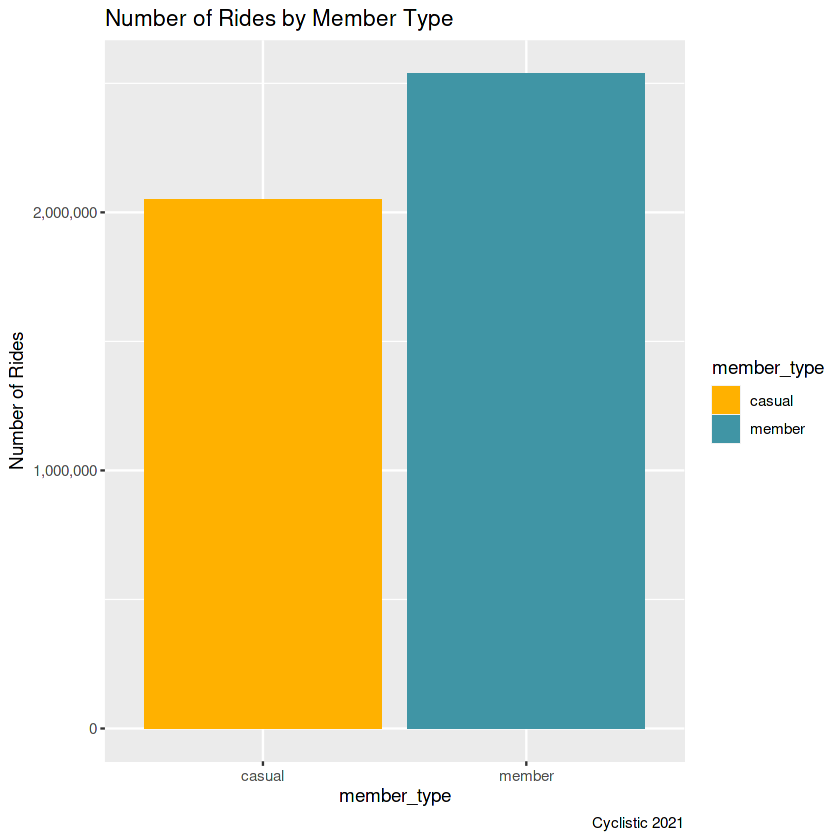

In [11]:
rides_2021_v2 %>% 
  group_by(member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  ggplot(aes(x = member_type, y = no_of_rides, fill = member_type)) +
  geom_col() +
  labs(title = "Number of Rides by Member Type", caption = "Cyclistic 2021") +
  scale_y_continuous(name = "Number of Rides", label=scales::comma) +
  scale_fill_manual(values = c("#FFB100","#4095A5"))

**Insights**
* We have more rides by users with membership than by casual users.

In [12]:
# Storing the latitude and longitude of the City of Chicago so that we can use it to create a map.
chicago_coord <- c(
  left = -87.700424,
  bottom = 41.790769,
  right = -87.554855,
  top = 41.990119
)
# Creating the map of Chicago and storing it in the variable chicago map
chicago_map <- get_stamenmap(
  bbox = chicago_coord,
  zoom = 12,
  maptype = "toner-lite"
)
chicago_map_t <- get_stamenmap(
  bbox = chicago_coord,
  zoom = 11,
  maptype = "terrain"
)

Source : http://tile.stamen.com/toner-lite/12/1050/1520.png

Source : http://tile.stamen.com/toner-lite/12/1051/1520.png

Source : http://tile.stamen.com/toner-lite/12/1050/1521.png

Source : http://tile.stamen.com/toner-lite/12/1051/1521.png

Source : http://tile.stamen.com/toner-lite/12/1050/1522.png

Source : http://tile.stamen.com/toner-lite/12/1051/1522.png

Source : http://tile.stamen.com/toner-lite/12/1050/1523.png

Source : http://tile.stamen.com/toner-lite/12/1051/1523.png

Source : http://tile.stamen.com/terrain/11/525/760.png

Source : http://tile.stamen.com/terrain/11/525/761.png



`summarise()` has grouped output by 'start_lng', 'start_lat'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'start_lng', 'start_lat', 'start_station_name'. You can override using the `.groups` argument.

Warning message:
“Removed 1 rows containing missing values (geom_point).”


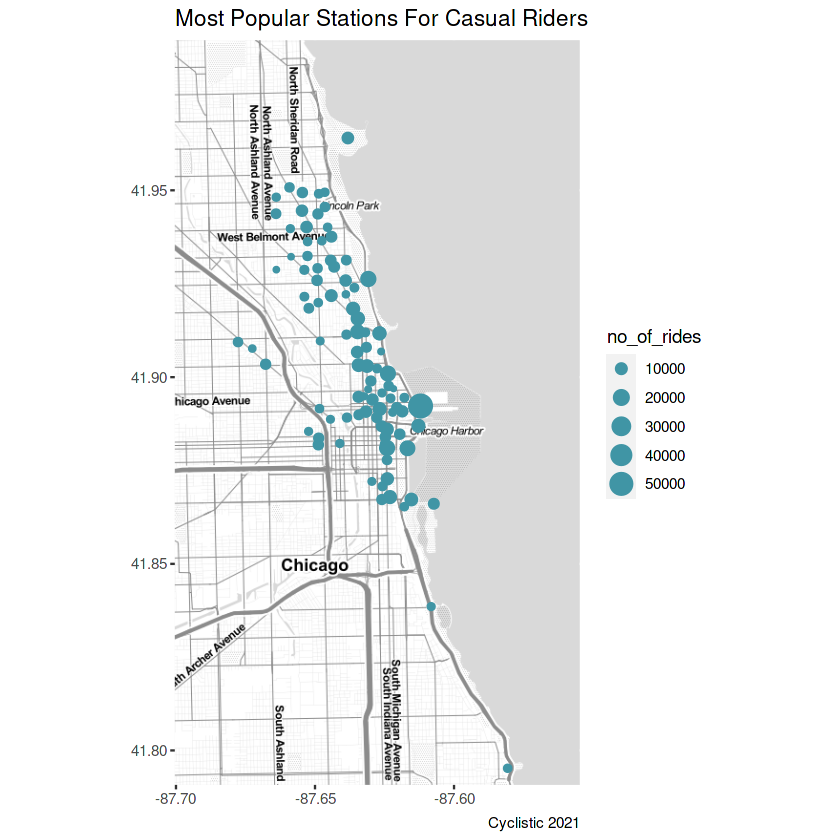

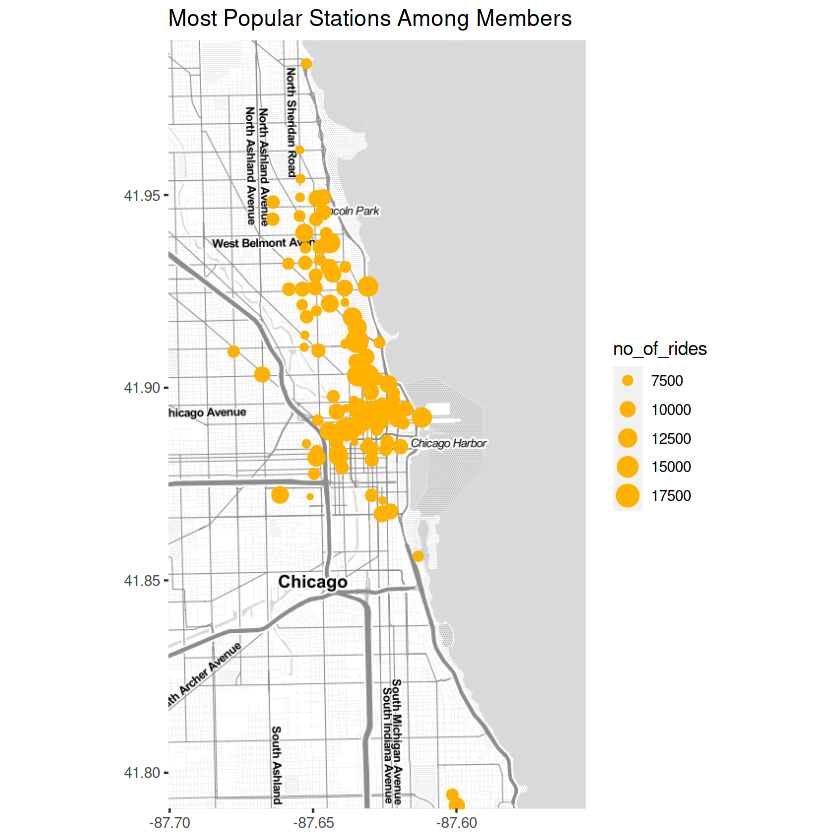

In [13]:
# Finding the top 100 most used stations by casual riders
casual_rides_geo <- rides_2021_v2 %>% 
  filter(member_type != "member") %>% 
  group_by(start_lng,start_lat, start_station_name) %>% 
  summarize(no_of_rides = n()) %>% 
  arrange(-no_of_rides) %>% 
  head(100)
# Plotting the stations on map.
ggmap(chicago_map) +
  geom_jitter(data = casual_rides_geo, aes(x = start_lng, start_lat, size = no_of_rides), color = "#4095A5") +
  labs(title = "Most Popular Stations For Casual Riders", caption = "Cyclistic 2021", x = NULL, y = NULL)
# Finding the top 100 most used stations by casual riders
member_rides_geo <- rides_2021_v2 %>% 
  filter(member_type == "member") %>% 
  group_by(start_lng,start_lat, start_station_name, member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  arrange(-no_of_rides) %>% 
  head(100)
# Plotting the stations on map.
ggmap(chicago_map) +
  geom_point(data = member_rides_geo, aes(x = start_lng, start_lat, size = no_of_rides), color = "#FFb100") +
  labs(title = "Most Popular Stations Among Members", x = NULL, y = NULL)

**Insights**
* We can see that the most active stations for casual members is closer to the Chicago Harbour whereas for members with membership there is no such trend.

`summarise()` has grouped output by 'start_lng', 'start_lat', 'end_lng', 'end_lat'. You can override using the `.groups` argument.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Warning message:
“Removed 10 rows containing missing values (geom_curve).”
`summarise()` has grouped output by 'start_lng', 'start_lat', 'end_lng', 'end_lat'. You can override using the `.groups` argument.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Warning message:
“Removed 31 rows containing missing values (geom_curve).”


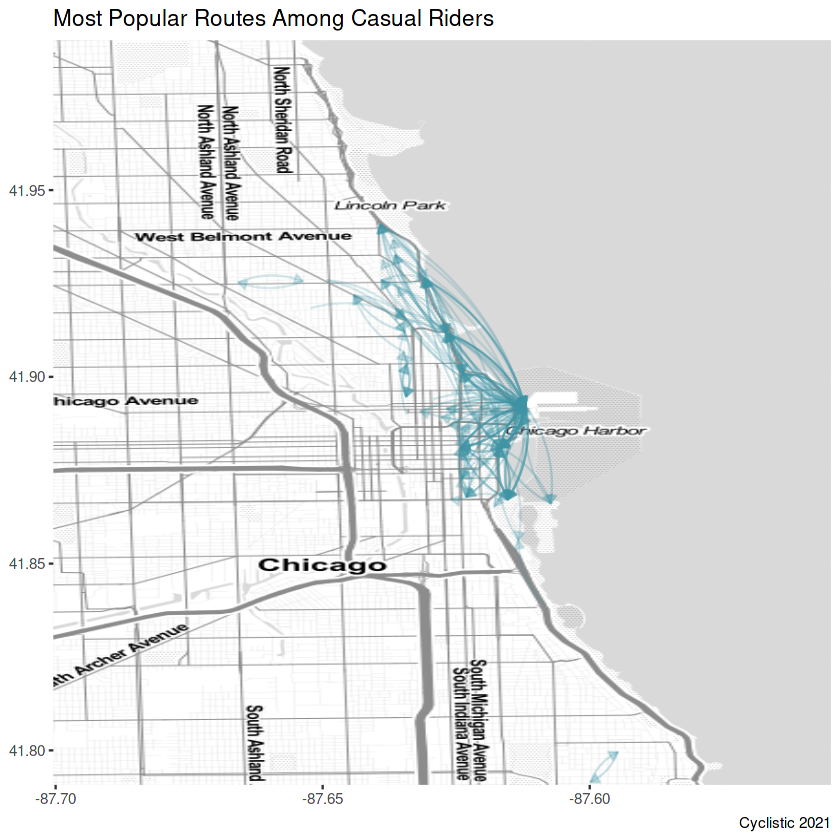

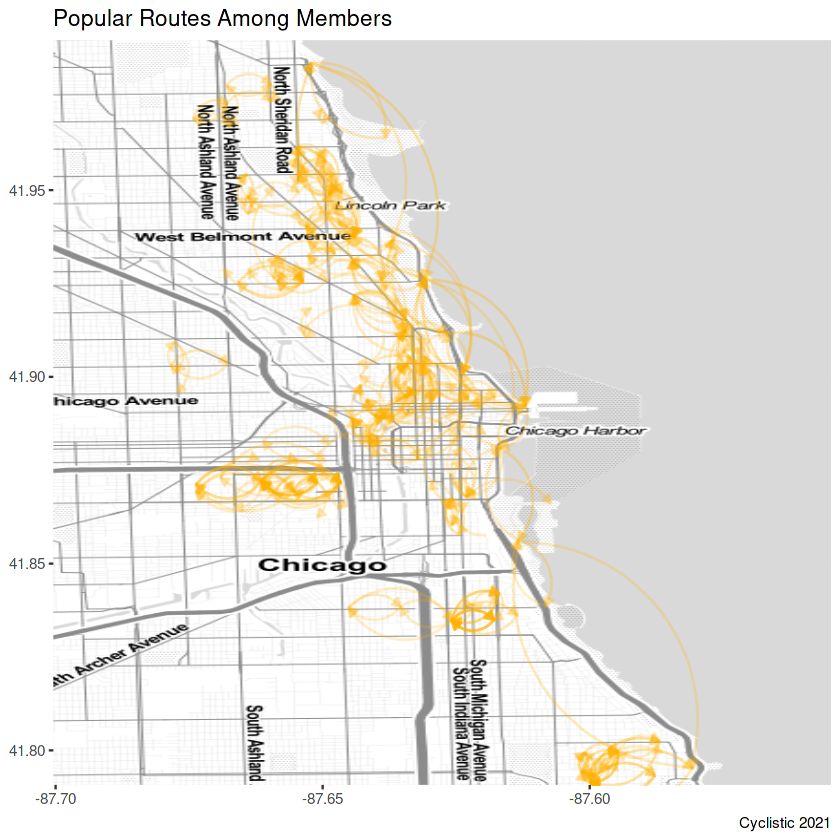

In [14]:
# Finding the most popular routes for Casual Members and storing it in a new dataframe.
# For this we would be considering the routes with more than 300 rides
popular_routes_casual <- rides_2021_v2 %>% 
  filter(member_type != "member") %>% 
  filter(start_lng != end_lng & start_lat != end_lat) %>% 
  group_by(start_lng,start_lat,end_lng,end_lat, member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  filter(no_of_rides > 300) %>% 
  arrange(-no_of_rides)
# Plotting the routes on the map of Chicago
ggmap(chicago_map) +
  geom_curve(popular_routes_casual, mapping = aes(x = start_lng, y = start_lat, xend = end_lng, yend = end_lat, alpha = no_of_rides), color = "#4095A5", size = 0.5, curvature = .2,arrow = arrow(length=unit(0.2,"cm"), ends="first", type = "closed")) +
  coord_cartesian() +
  theme(legend.position = "none") +
  labs(title = "Most Popular Routes Among Casual Riders", caption = "Cyclistic 2021", x = NULL, y = NULL) +
  scale_alpha(range = c(0.2,1.5))

# Finding the most popular routes for members with Membership and storing it in a new dataframe.
popular_routes_member <- rides_2021_v2 %>% 
  filter(member_type == "member") %>% 
  filter(start_lng != end_lng & start_lat != end_lat) %>% 
  group_by(start_lng,start_lat,end_lng,end_lat, member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  filter(no_of_rides > 300) %>% 
  arrange(-no_of_rides)
# Plotting the routes on the map of Chicago
ggmap(chicago_map) +
  geom_curve(popular_routes_member, mapping = aes(x = start_lng, y = start_lat, xend = end_lng, yend = end_lat, alpha = no_of_rides), color = "#ffb100", size = 0.6, curvature = .5,arrow = arrow(length=unit(0.2,"cm"), ends="first", type = "closed")) +
  coord_cartesian() +
  labs(title = "Popular Routes Among Members", x = NULL, y = NULL, caption = "Cyclistic 2021") +
  theme(legend.position = "none") +
  scale_alpha(range = c(0.2,1.5))

**Insights**
* Casual riders tend to use routes closer to the coast. Those are the places where leisure activities happen.
* Members tend to use routes which are mose inside the city. This is where most of the corporate offices are.  
 *Limitations*
 * *We have no idea about the route they took to reach the end stations.*

In [15]:
# Finding the number of Rides on different times of the day.
rides_2021_v2 %>% 
  group_by(hour, member_type) %>% 
  summarize(no_of_rides = n()) %>%
  arrange(hour)

`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.



hour,member_type,no_of_rides
<int>,<chr>,<int>
0,casual,42321
0,member,25237
1,casual,30667
1,member,16362
2,casual,19579
2,member,8976
3,casual,10220
3,member,5104
4,casual,6688


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.



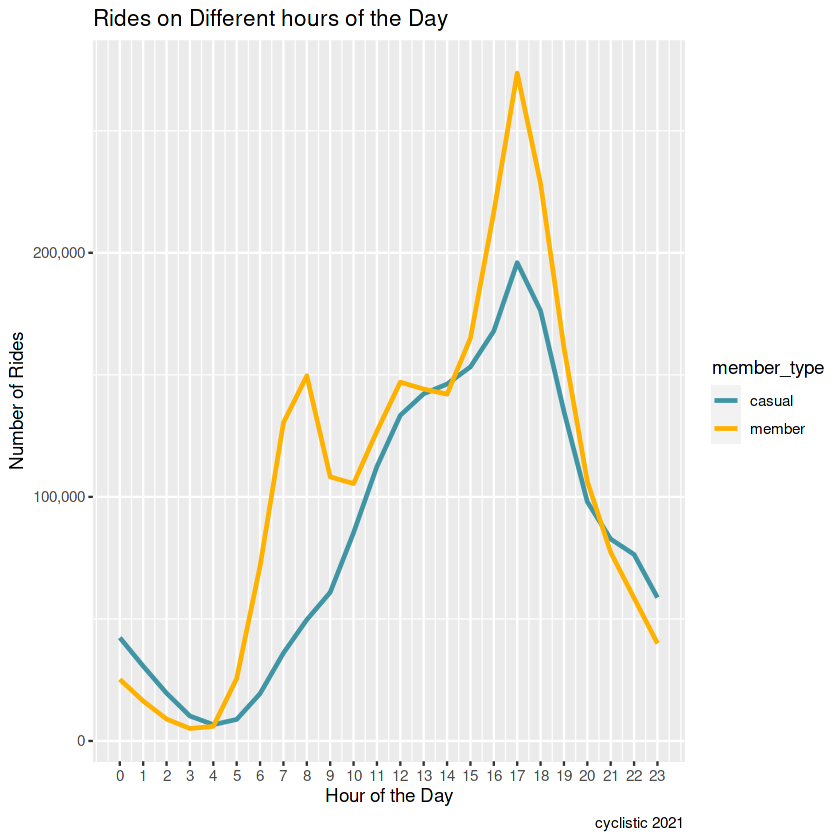

In [16]:
# Plot showing the Number of Rides at different times of the Day
rides_2021_v2 %>% 
  group_by(hour, member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  ggplot(aes(x = hour, y = no_of_rides)) +
  geom_line(aes(color = member_type), size = 1) +
  scale_y_continuous(name = "Number of Rides", label = scales::comma) +
  scale_x_continuous(name = "Hour of the Day", labels = 0:23, breaks = 0:23) +
  labs(title = "Rides on Different hours of the Day", caption = "cyclistic 2021") +
  scale_color_manual(values = c(casual = "#4095A5", member = "#FFB100")) +
  theme_gray()

#### Insights
**We can see that for Members the number of rides is related to office hours because of the following reasons.**
* The number of riders start is higher at around 8:00 a.m, this is the time when most of the people go to work. 
* The number of rides decrese during the time when people start working to the time there is lunch breaks. After which the number of rides increase this the time when most of the office have lunch breaks(around 10:00 a.m to 12:00 p.m). 
* Then the number of rides starts to increase from around(03:00 p.m) and peaks during 05:00 p.m, this is the time when most of the people return from work.  

*For both casual and members the number of rides peak during the evening time.*

In [17]:
# calculating number of rides on day type.
rides_2021_v2 %>% 
  group_by(day_type,member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  arrange(-no_of_rides)

`summarise()` has grouped output by 'day_type'. You can override using the `.groups` argument.



day_type,member_type,no_of_rides
<chr>,<chr>,<int>
weekday,member,1871520
weekday,casual,1176230
weekend,casual,872072
weekend,member,668282


`summarise()` has grouped output by 'day_type'. You can override using the `.groups` argument.



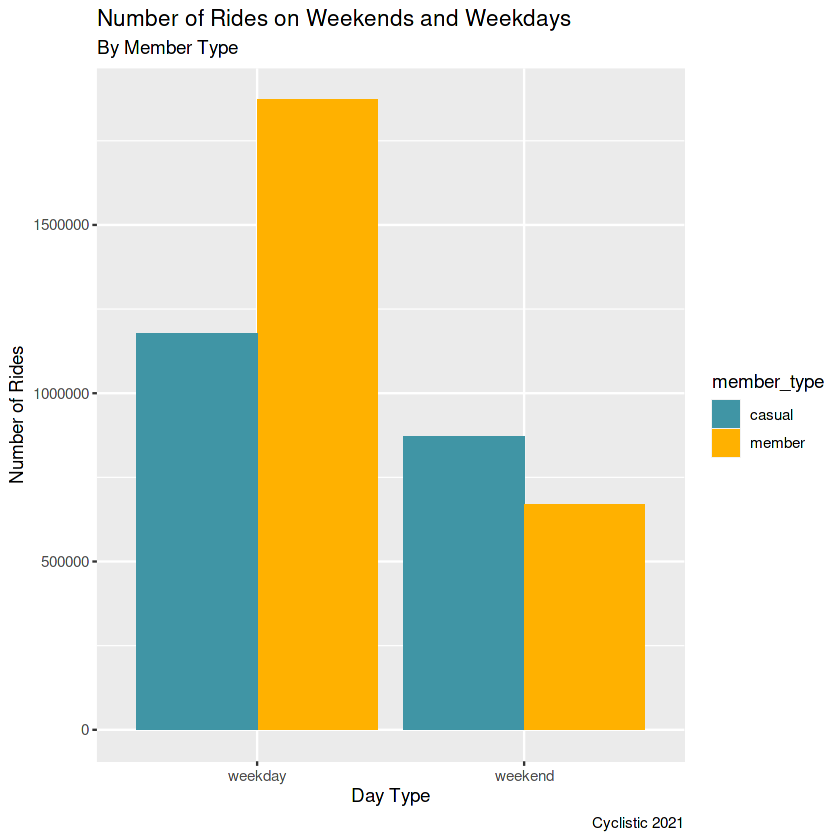

In [18]:
# Plotting number of rides on weekdays and weekends.
rides_2021_v2 %>% 
  group_by(day_type,member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  arrange(-no_of_rides) %>% 
  ggplot(aes(x = day_type, y = no_of_rides)) +
  geom_col(aes(fill = member_type), position = "dodge") +
  labs(title = "Number of Rides on Weekends and Weekdays", subtitle = "By Member Type",caption = "Cyclistic 2021", x = "Day Type", y = "Number of Rides") +
  scale_fill_manual(values = c("#4095A5","#FFB100")) +
  theme_gray()

*Insights*
* We have more members riding on weekdays as comapred to casual riders.
* We have more casual members riding on weekends as comapred to members.

`summarise()` has grouped output by 'day'. You can override using the `.groups` argument.



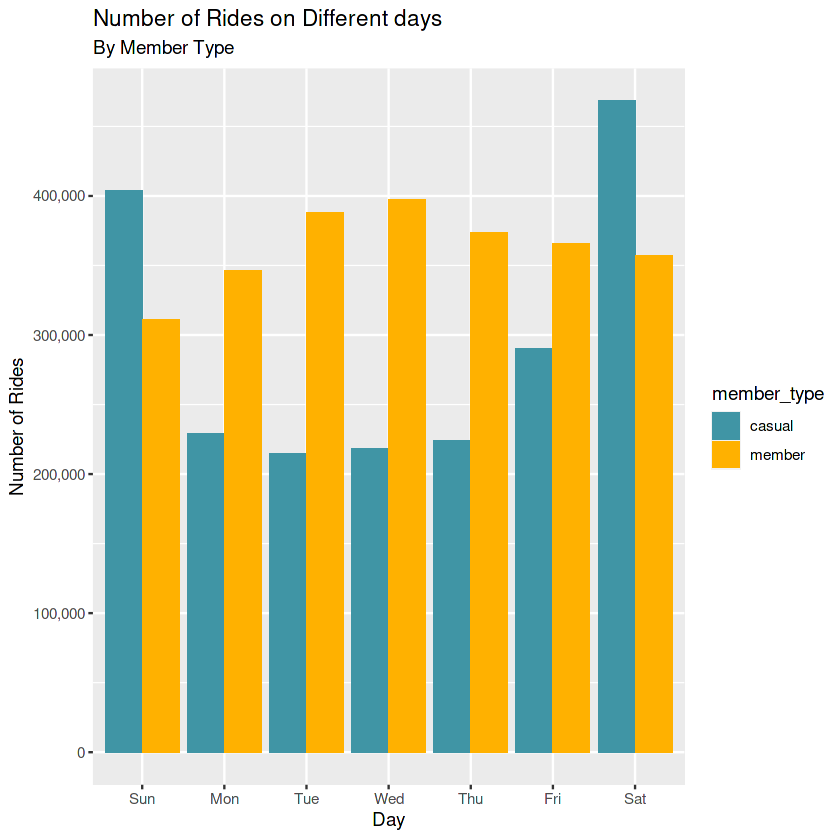

In [19]:
# Calculating ridership on different days of the week.
rides_2021_v2 %>% 
  group_by(day, member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  ggplot(aes(x = day, y = no_of_rides)) +
  geom_col(aes(fill = member_type), position = "dodge") +
  scale_y_continuous(name = "Number of Rides", label = scales::comma) +
  labs(title = "Number of Rides on Different days", subtitle = "By Member Type", x = "Day") +
  scale_fill_manual(values = c("#4095A5", "#FFB100")) +
  theme_gray()

In [20]:
# Calculating ridership during different months of the year.
rides_2021_v2 %>% 
  group_by(month = month(started_at, label = TRUE)) %>% 
  summarize(no_of_rides = n()) %>% 
  arrange(month)

month,no_of_rides
<ord>,<int>
Jan,83508
Feb,42994
Mar,205687
Apr,298199
May,450978
Jun,608763
Jul,692293
Aug,674377
Sep,621103


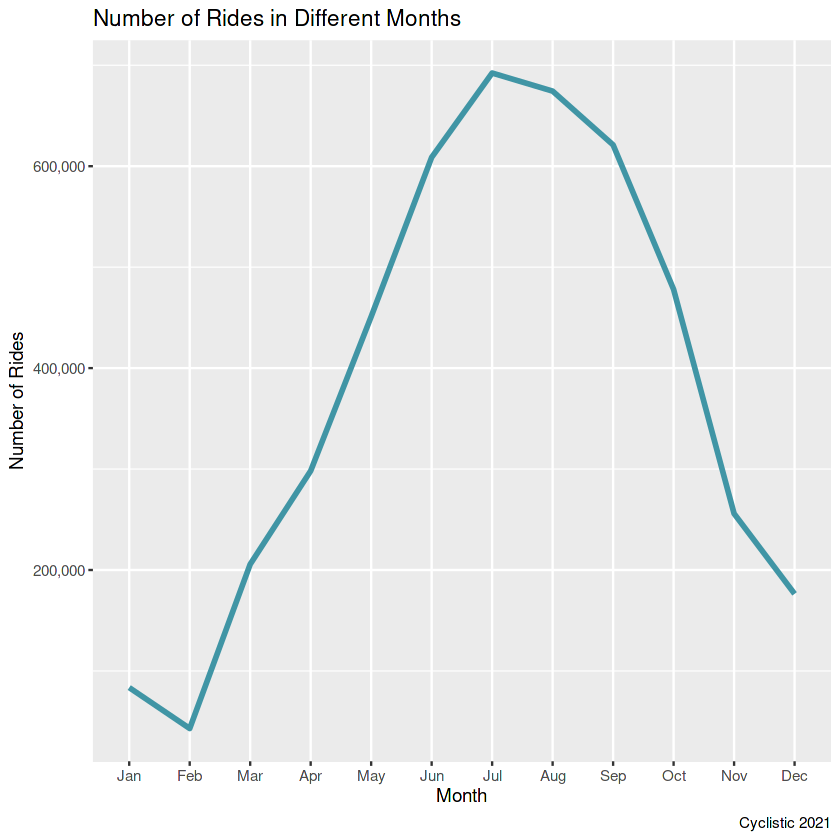

In [21]:
# Plot showing ridership on different months of the year.
rides_2021_v2 %>% 
  group_by(month = month(started_at, label = TRUE)) %>% 
  summarize(no_of_rides = n()) %>% 
  ggplot(aes(x = month, y = no_of_rides, group = 1)) +
  geom_line(color = "#4095a5", size = 1.2) +
  scale_y_continuous(name = "Number of Rides", label = scales::comma) +
  labs(title = "Number of Rides in Different Months", caption = "Cyclistic 2021", x = "Month") +
  theme_gray()

*Insights*
* People like to ride more in the spring and summer season.
* The time between June and September is the time when the organization can maximize their profits by launching campaigns in this time period.

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



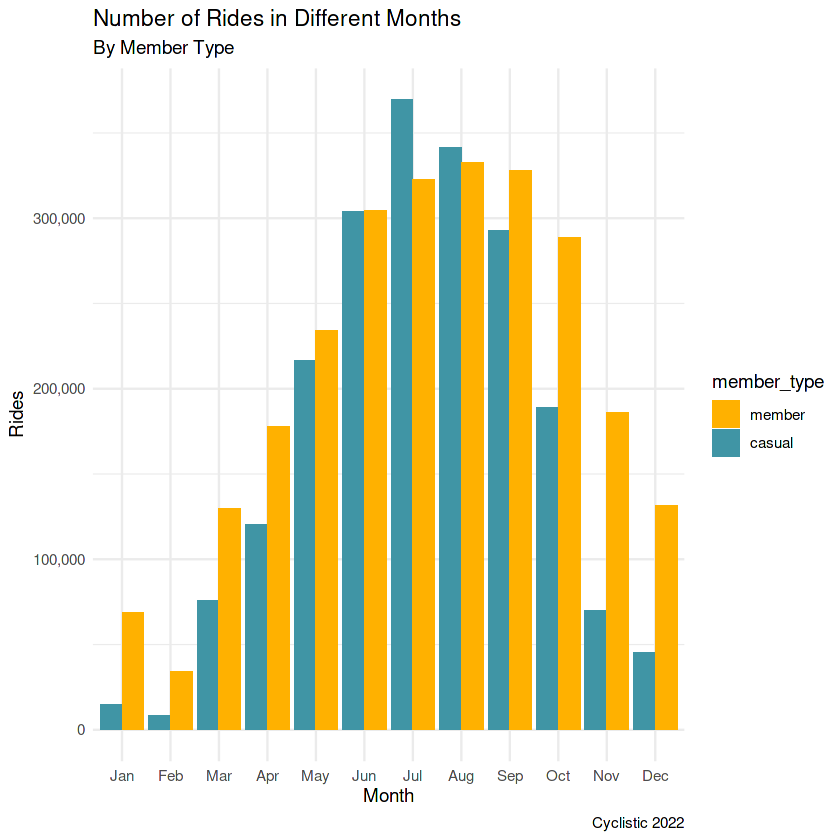

In [22]:
rides_2021_v2 %>% 
  group_by(month = month(started_at, label = TRUE), member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  ggplot(aes(x = month, y = no_of_rides)) +
  geom_col(aes(fill = member_type), position = "dodge") +
  scale_y_continuous(name = "Rides", label = scales::comma) +
  labs(title = "Number of Rides in Different Months", subtitle = "By Member Type", caption = "Cyclistic 2022", x = "Month") +
  scale_fill_manual(values = c(member = "#ffb100", casual = "#4095a5")) +
  theme_minimal()

*Insights*
* Casual riders prefer to ride more in the summer season that is around June to September.
* On other times of the year we have a large gap in the ridership between casual riders and members.

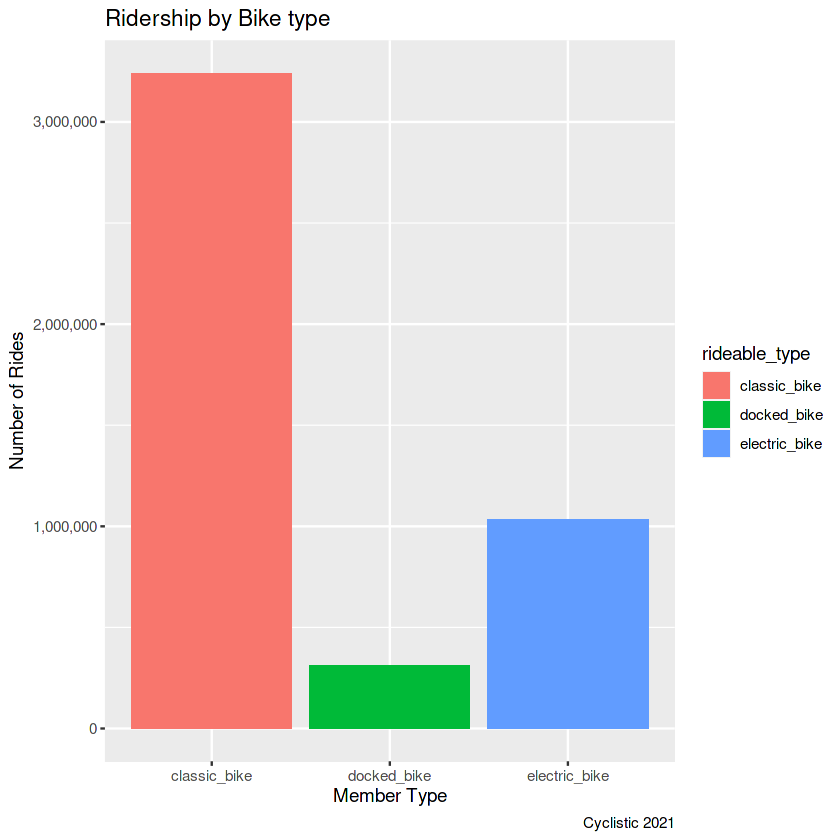

In [23]:
# Finding the number of rides by Bike type
rides_2021_v2 %>%
group_by(rideable_type) %>%
summarize(no_of_rides = n()) %>%
ggplot(aes(x = rideable_type, y = no_of_rides)) +
geom_col(aes(fill = rideable_type)) +
scale_y_continuous(name = "Number of Rides", label = scales::comma) +
labs(title = "Ridership by Bike type", caption = "Cyclistic 2021", x = "Member Type")

**Insights**
* The classic and the electric bikes are most popular followed by the docked bikes.

`summarise()` has grouped output by 'rideable_type'. You can override using the `.groups` argument.



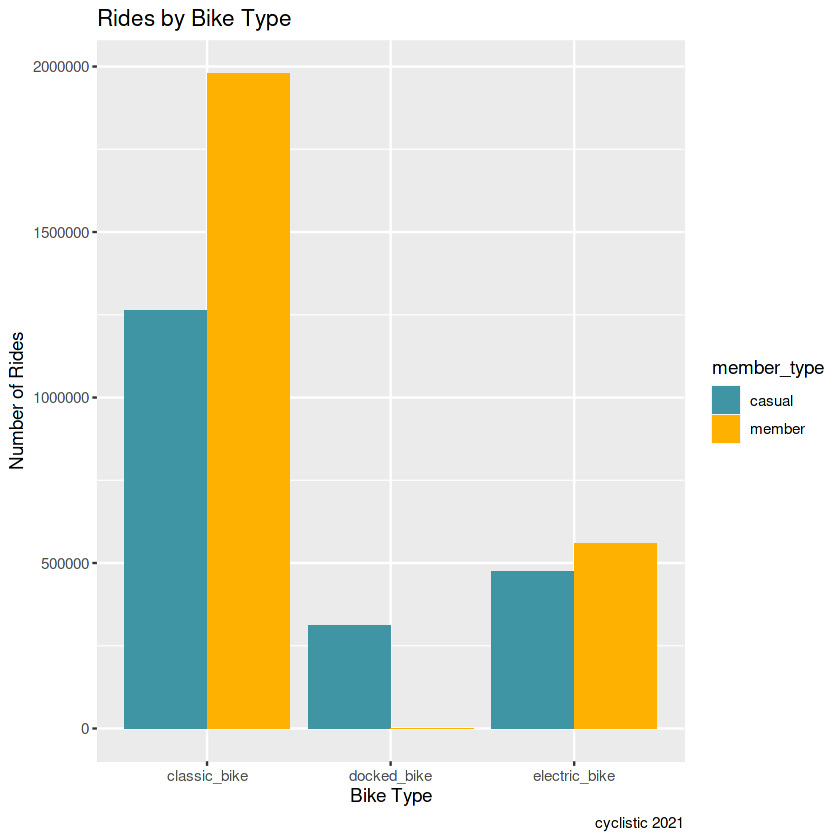

In [24]:
# Plotting the rides by bike types.
rides_2021_v2 %>% 
  group_by(rideable_type, member_type) %>% 
  summarize(no_of_rides = n()) %>% 
  ggplot(aes(x = rideable_type, y = no_of_rides, fill = member_type)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = c(casual = "#4095a5",member = "#ffb100" )) +
  labs(title = "Rides by Bike Type", caption = "cyclistic 2021", y = "Number of Rides", x = "Bike Type" )

**Insights**
* Classic and electric bikes are popular among Members. Whereas docked bikes are not used by them.
* Since docked bikes are almost not at all used by members we won't be including them further in our analysis.

`summarise()` has grouped output by 'member_type', 'rideable_type'. You can override using the `.groups` argument.



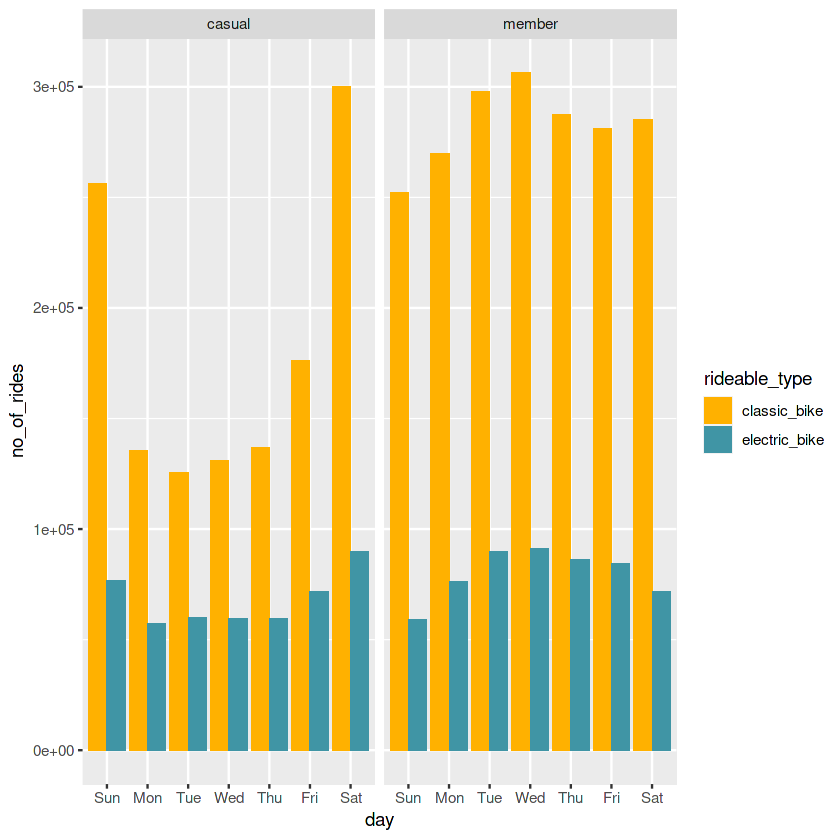

In [25]:
rides_2021_v2 %>%
  filter(rideable_type != "docked_bike") %>% 
  group_by(member_type, rideable_type, day) %>% 
  summarize(no_of_rides = n()) %>% 
  ggplot(aes(x = day, y = no_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") +
  facet_wrap(~member_type) +
  scale_fill_manual(values = c(classic_bike = "#ffb100", electric_bike = "#4095a5"))

**Insights**
* Classic bikes are more popular among Members.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



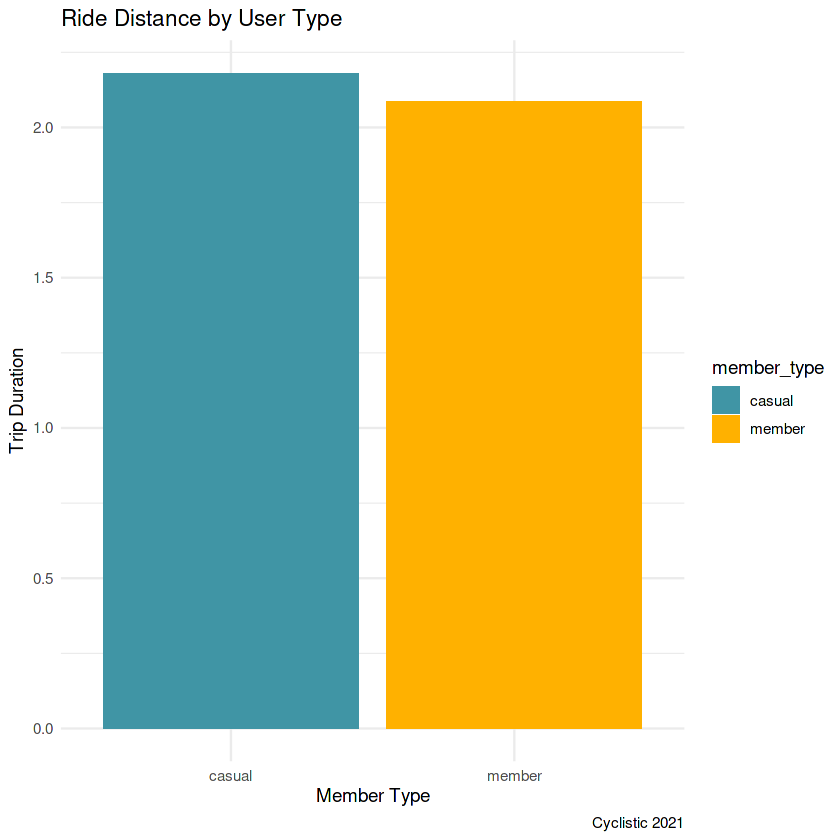

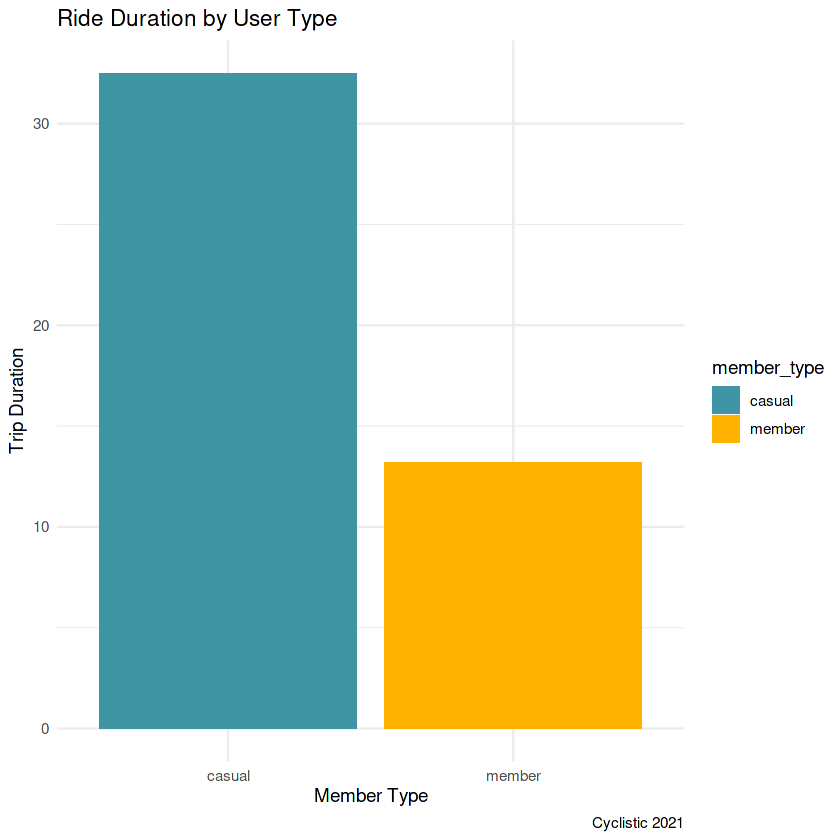

In [26]:
rides_2021_v2 %>% 
  group_by(member_type) %>% 
  summarize(mean_trip_duration = mean(ride_duration), mean_ride_distance = mean(ride_distance)) %>%
  ggplot(aes(x = member_type, y = mean_ride_distance)) +
  geom_col(aes(fill = member_type)) +
  scale_fill_manual(values = c(casual = "#4095a5", member = "#ffb100")) +
  labs(title = "Ride Distance by User Type", caption = "Cyclistic 2021", x = "Member Type", y = "Trip Duration") +
  theme_minimal()
rides_2021_v2 %>% 
  group_by(member_type) %>% 
  summarize(mean_trip_duration = mean(ride_duration), mean_ride_distance = mean(ride_distance)) %>%
  ggplot(aes(x = member_type, y = mean_trip_duration)) +
  geom_col(aes(fill = member_type)) +
  scale_fill_manual(values = c(casual = "#4095a5", member = "#ffb100")) +
  labs(title = "Ride Duration by User Type", caption = "Cyclistic 2021", x = "Member Type", y = "Trip Duration") +
  theme_minimal()


**Insights**
* The mean ride distance for both type of users is almost same but the ride duration for casual users is almost thrice of the users with membership.
* So we can conclude that Casual users might be using our bike mainly for leisure purpose whereas users with membership mainly use our service for commuting to work.  

*Limitation*  
*We have no idea about the path which the users took to travel from one station to another. So we can't accurately calculate the ride distance*  
*So we won't be accounting ride distance in the later parts of the analysis.*

 

`summarise()` has grouped output by 'member_type'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



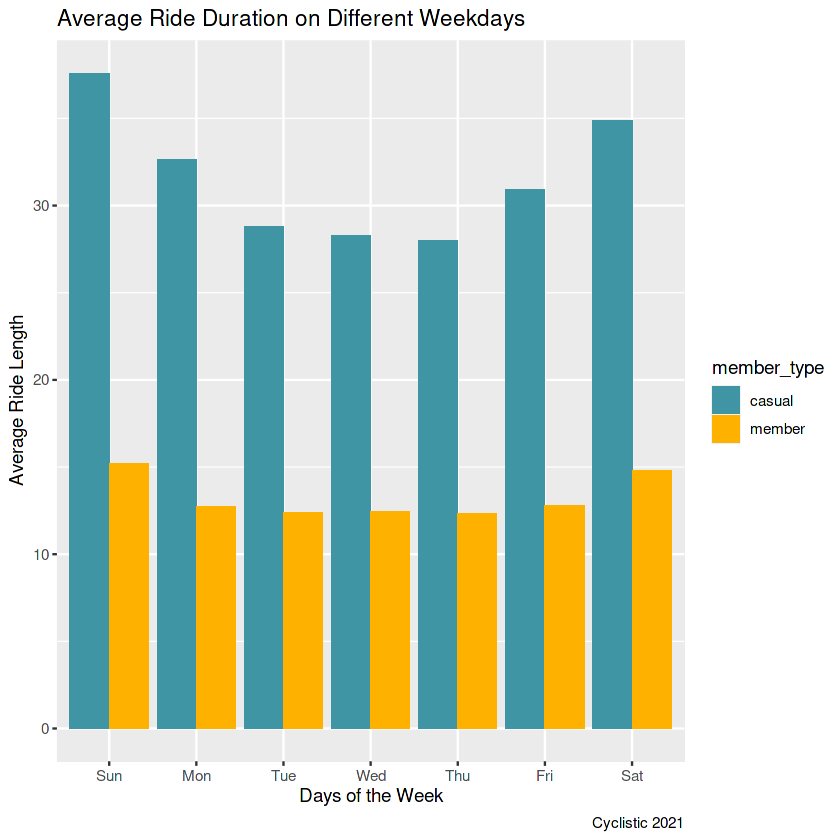

In [27]:
# Plotting the ride duration on different weekdays.
rides_2021_v2 %>%
  group_by(member_type,day) %>%
  summarize(avg_ride_duration = mean(ride_duration)) %>% 
  arrange(member_type, day) %>% 
  ggplot() +
  geom_col(mapping = aes(x = day, y = avg_ride_duration, fill = member_type), position = "dodge") +
  labs(title = "Average Ride Duration on Different Weekdays",caption = "Cyclistic 2021", x = "Days of the Week", y = "Average Ride Length") +
  scale_fill_manual(values = c(casual = "#4095a5", member = "#ffb100"))

**From the above data we can see that casual members have a higher average ride duration as compared to members having a membership. With the ride duration being higher on weekends as compared to weekdays.**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



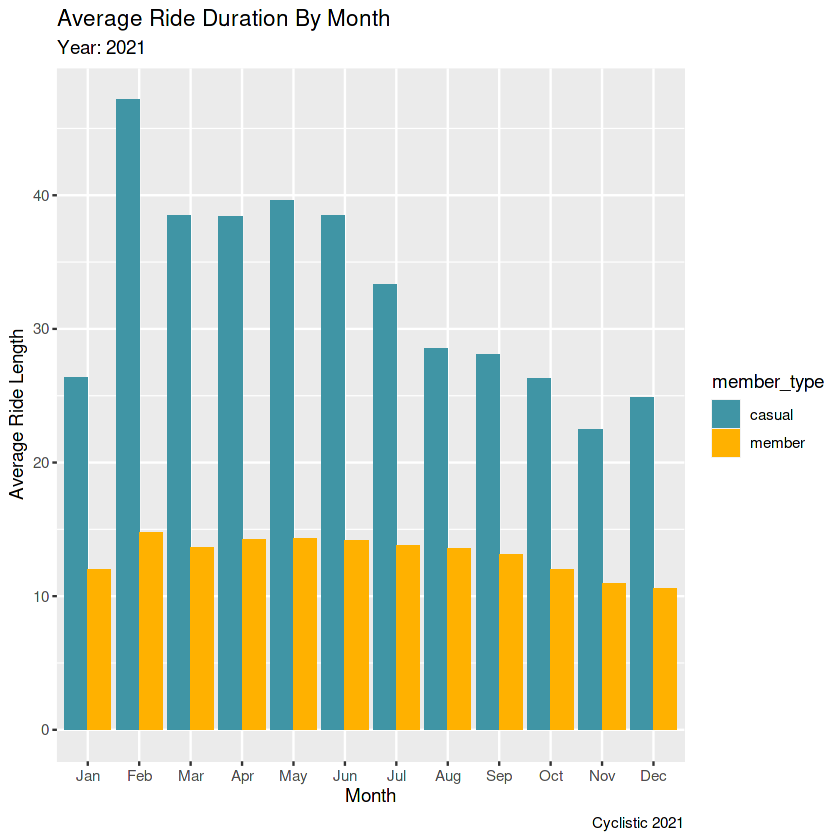

In [28]:
# Plot showing ride duration on different months.
rides_2021_v2 %>% 
  group_by(month = month(started_at, label = TRUE), member_type) %>% 
  summarize(avg_ride_duration = mean(ride_duration)) %>% 
  ggplot() +
  geom_col(mapping = aes(x = month, y = avg_ride_duration, fill = member_type), position = "dodge") +
  labs(title = "Average Ride Duration By Month", subtitle = "Year: 2021",caption = "Cyclistic 2021", x = "Month", y = "Average Ride Length") +
  scale_fill_manual(values = c(casual = "#4095a5", member = "#ffb100"))

* From the above plot we can see that there is a seasonal trend in the ride duration for casual riders with ride duration being highher in the months of February March April May and June as compared to other parts of the year.

#### Phase 5: Share Phase
 **Key Objective:**
 
* **Share my conclusions:**  
1. Instead of offering casual riders annual membership and hourly or day membership we can offer them monthly membership. 
2. Launching campaigns targetting casual riders who are working professionals.
3. Increase awareness among members by sharing how they have helped reduce the carbon footprint, how much gas fee have they saved by using bicycles, how much calories have they burnt.



### Thanks for reading. 
**Do let me know if you have any feedback**